# خلاصه ای از مسیر 
## کارهایی که با داده انجام شد
- ساختن یک ستون جدید به عنوان قیمت با ضرب کردن مقدار کمیت با قیمت واحد
- حذف ۵ هفته اول به خاطر وجود هفته بدون درآمد در هفته ۵ام برای آسانتر شدن مدل
- داده ها از جمع روزانه به جمع درآمد در هفته و ماه تبدیل شد و جمع درآمد در هفته پذیرفته شد با توجه نمودار های خودهمبستگی و  خودهمبستگی جزئی آنها

## تست هایی که گرفته شد
- دیکی-فولر برای نشان دادن مانایی داده

## مشکلاتی که به وجود آمد
- مدل کم برازش شد با وجود اینکه ارورهایی ما پایین بود ولی مدل بسیار بد پیش بینی می کرد به طوری که یک خط ثابت را پیش بینی میکرد




برای اطلاعات بیشتر به فایل پی دی اف همراه مراجعه کنید.

# وارد کردن کتابخانه ها و فایل اکسل داده

In [95]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import seasonal_plot , month_plot , plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima , model_selection , ARIMA 
from sklearn.metrics import mean_absolute_percentage_error , mean_squared_error , mean_absolute_error , root_mean_squared_error
from sklearn.model_selection import ParameterGrid , TimeSeriesSplit
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.diagnostic import het_arch
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
warnings.filterwarnings("ignore", message=".*force_all_finite.*")
import warnings
warnings.filterwarnings("ignore")
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [2]:
df = pd.read_excel('Online_Retail.xlsx' , parse_dates=True , index_col='InvoiceDate')
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom


# تحلیل اکتشافی داده

In [3]:
df['Price'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Price
InvoiceDate,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.34
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.34
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34


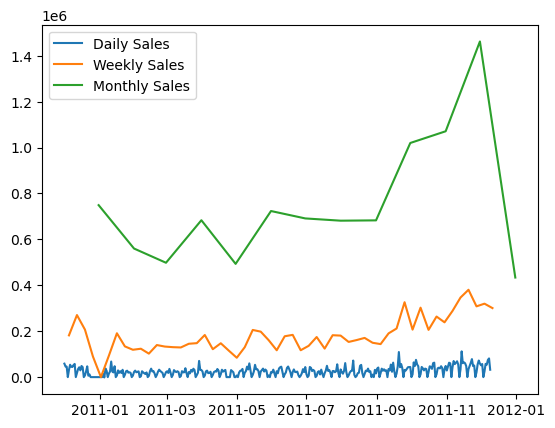

<Figure size 1000x1500 with 0 Axes>

In [4]:
daily_sales = df['Price'].resample('D').sum()
weekly_sales = df['Price'].resample('W').sum()
monthly_sales = df['Price'].resample('M').sum()

plt.plot(daily_sales , label='Daily Sales')
plt.plot(weekly_sales , label = 'Weekly Sales')
plt.plot(monthly_sales , label = 'Monthly Sales')
plt.legend()
plt.figure(figsize=(10,15))
plt.show()

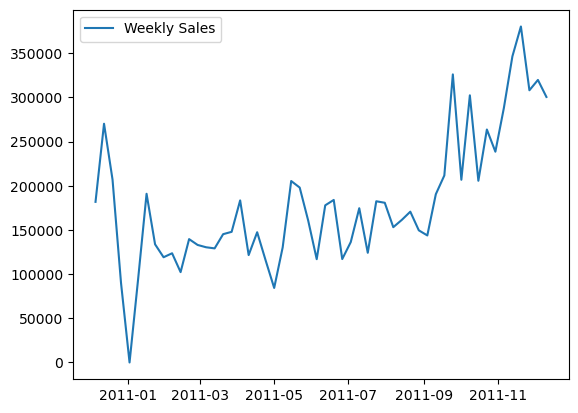

<Figure size 1000x1500 with 0 Axes>

In [5]:
plt.plot(weekly_sales , label = 'Weekly Sales')
plt.legend()
plt.figure(figsize=(10,15))
plt.show()

In [6]:
weekly_sales

InvoiceDate
2010-12-05    181847.250
2010-12-12    270287.030
2010-12-19    207052.170
2010-12-26     89770.570
2011-01-02         0.000
2011-01-09     93720.930
2011-01-16    190994.960
2011-01-23    133782.910
2011-01-30    119136.810
2011-02-06    123642.180
2011-02-13    102296.930
2011-02-20    139664.580
2011-02-27    133069.930
2011-03-06    130435.560
2011-03-13    129180.960
2011-03-20    145262.610
2011-03-27    147909.800
2011-04-03    183501.710
2011-04-10    121598.220
2011-04-17    147459.771
2011-04-24    115461.250
2011-05-01     84382.660
2011-05-08    130354.310
2011-05-15    205445.230
2011-05-22    198031.530
2011-05-29    160569.820
2011-06-05    116932.520
2011-06-12    177916.870
2011-06-19    184016.500
2011-06-26    117086.710
2011-07-03    136287.440
2011-07-10    174659.170
2011-07-17    124163.170
2011-07-24    182513.960
2011-07-31    180814.851
2011-08-07    153176.200
2011-08-14    161417.020
2011-08-21    170724.890
2011-08-28    149603.500
2011-09-04   

In [7]:
weekly_sales = weekly_sales[5:]

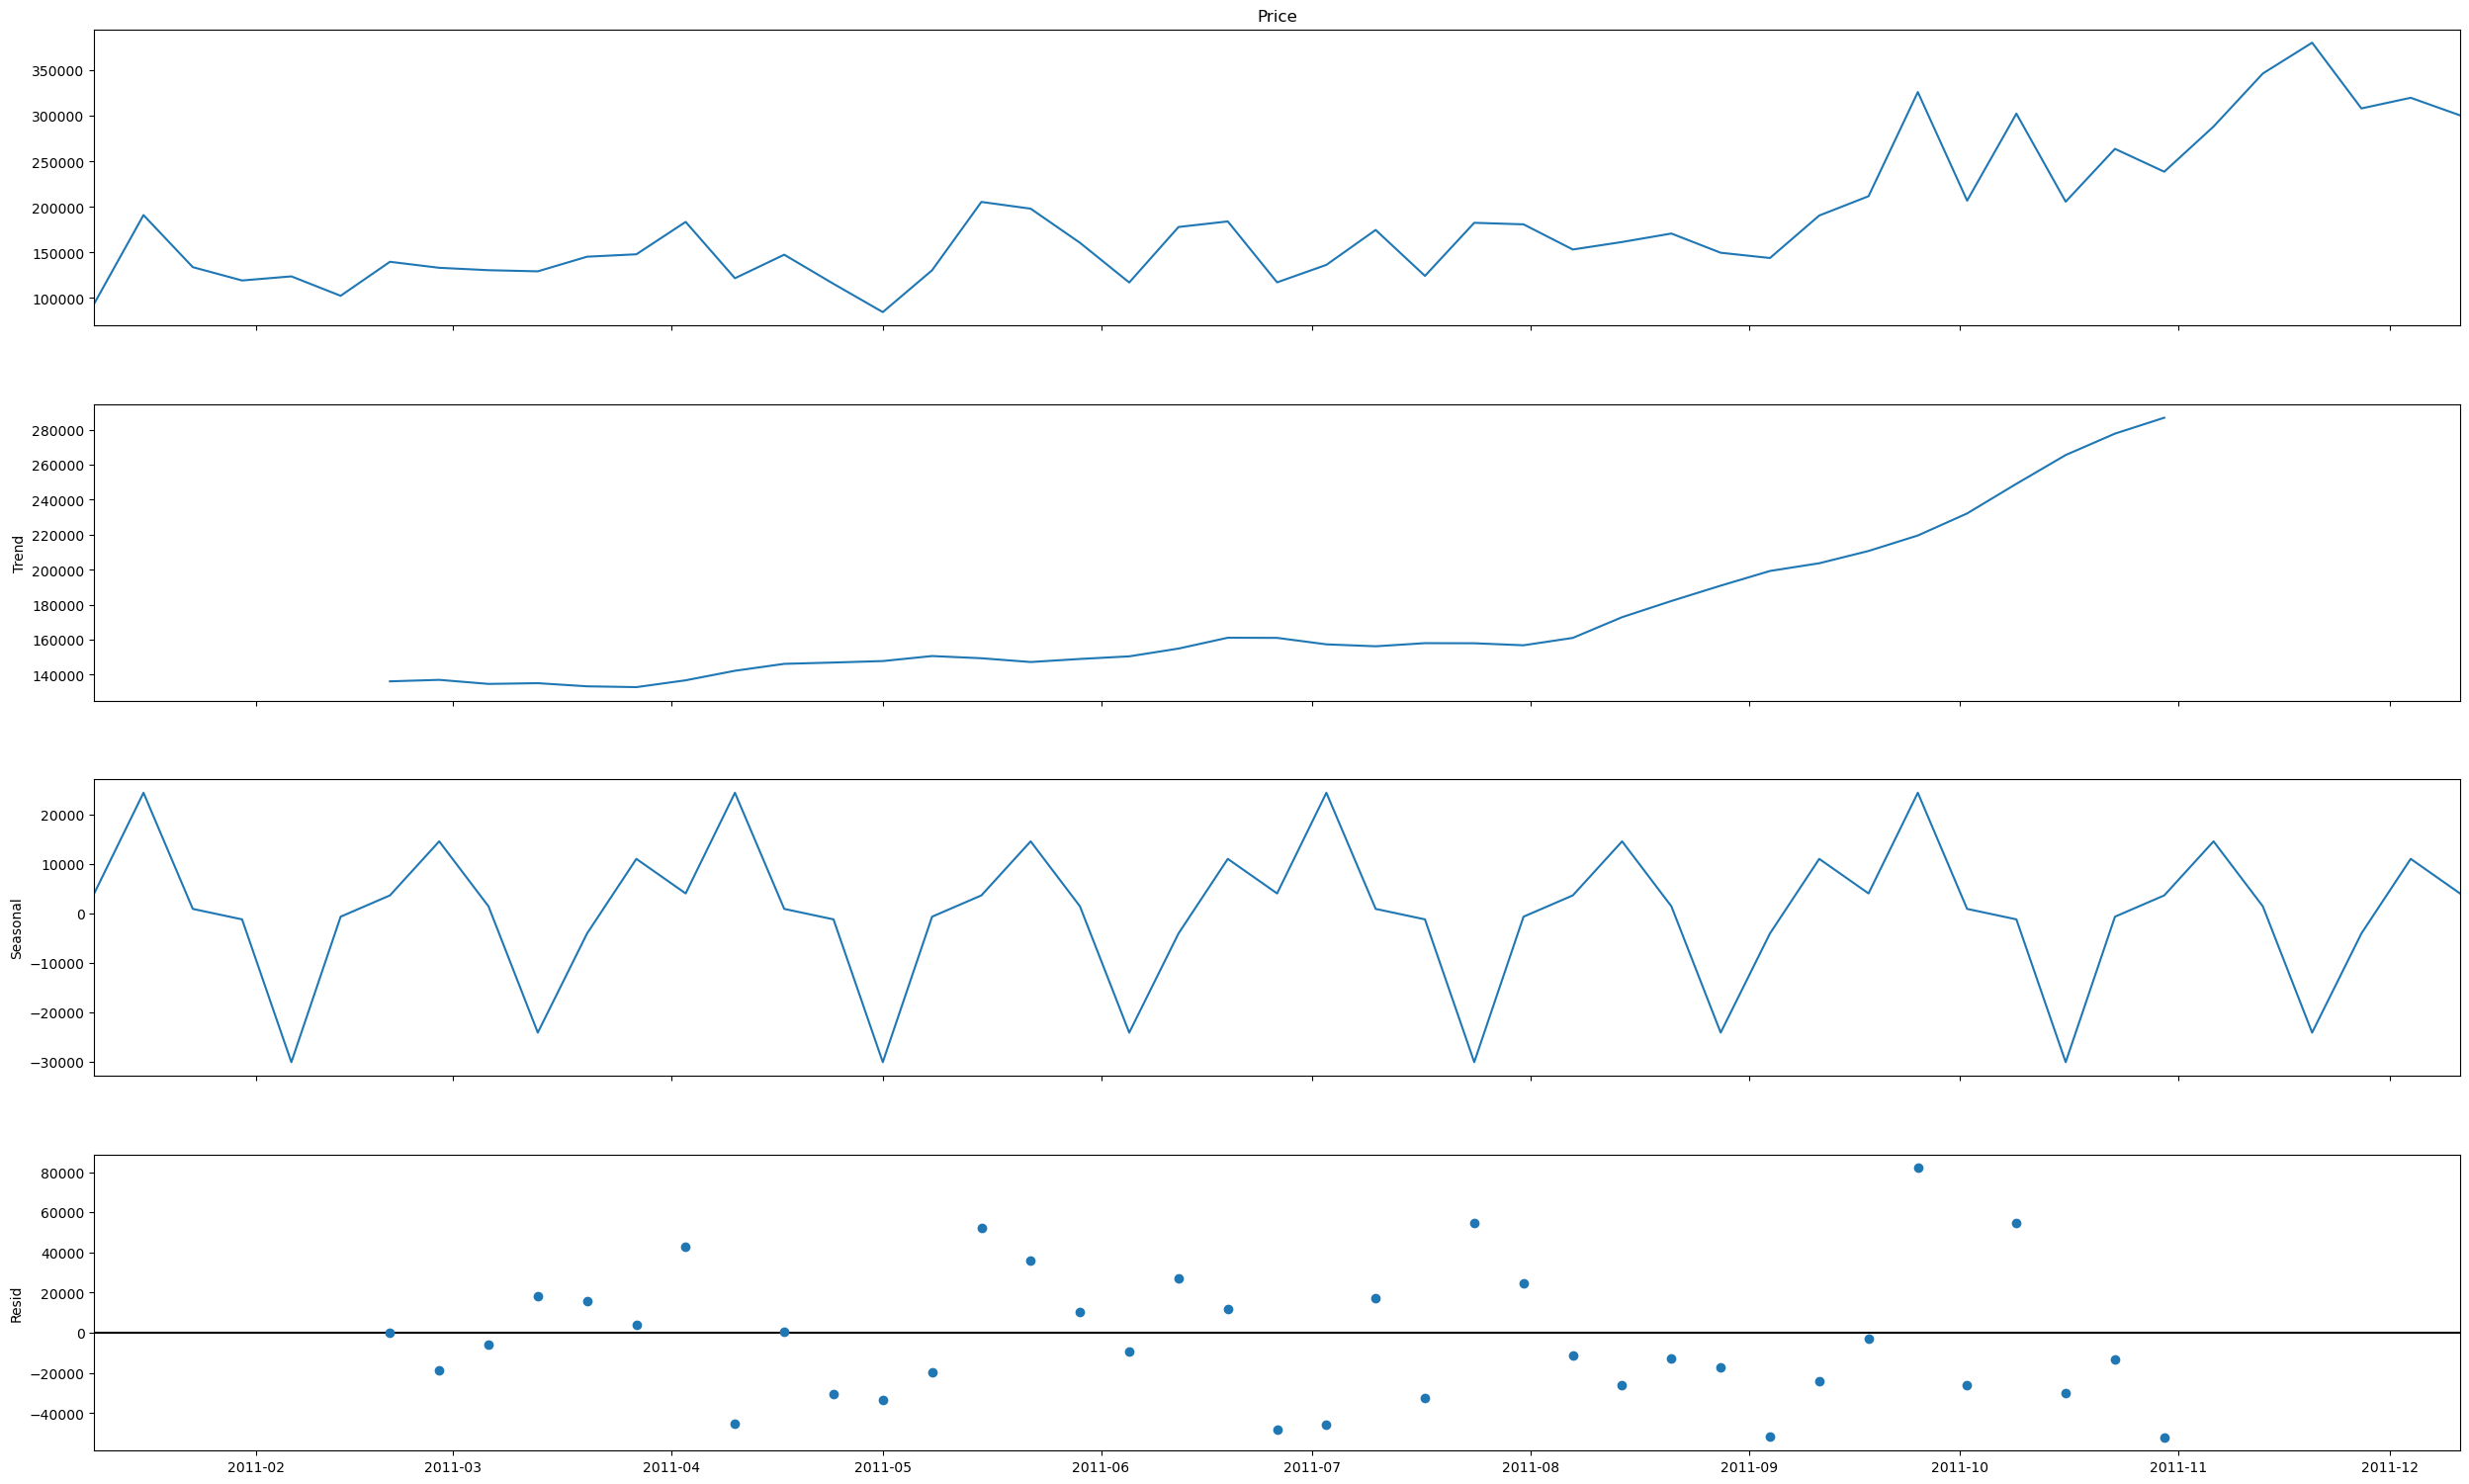

In [98]:
dec = seasonal_decompose(weekly_sales , period=12)
fig = dec.plot()
fig.set_size_inches(30,17)
plt.show()

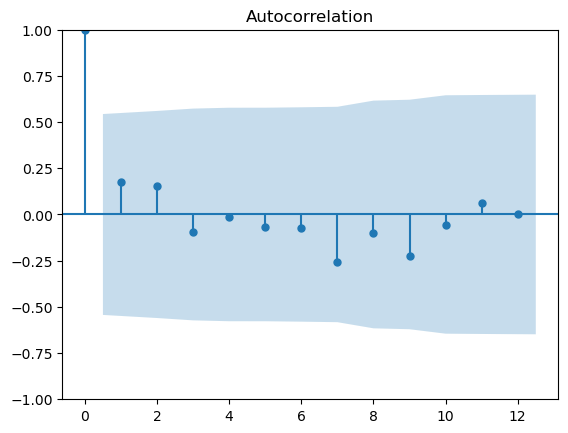

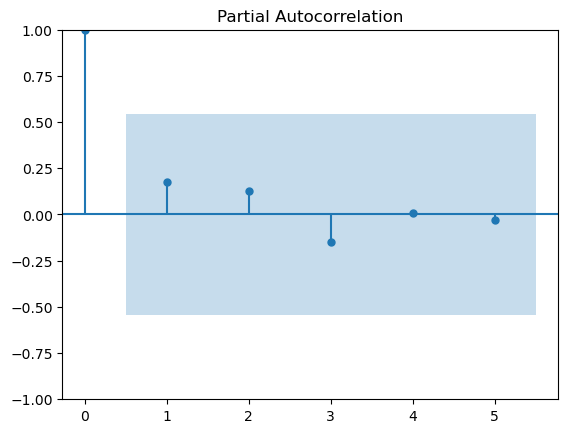

In [9]:
plot_acf(monthly_sales)
plot_pacf(monthly_sales , lags=min(5, len(monthly_sales)//2 - 1))
plt.show()

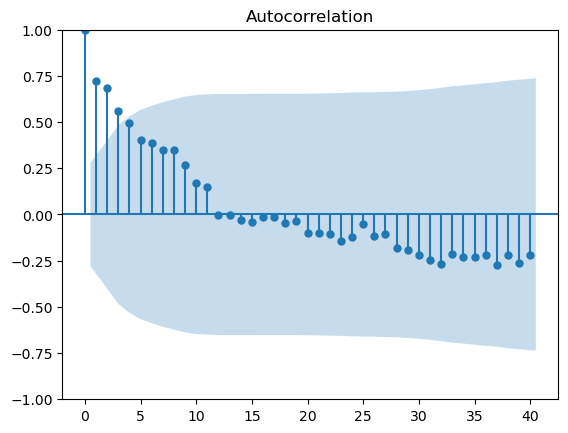

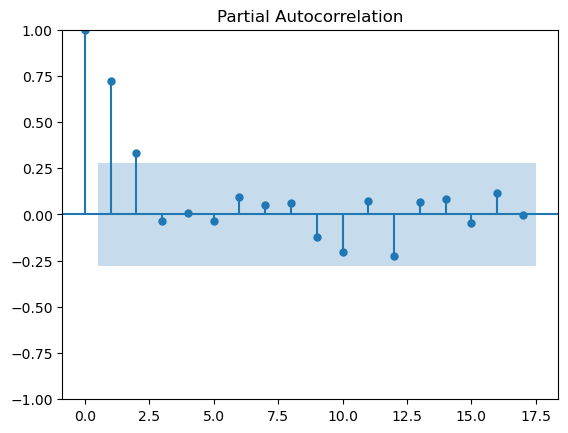

In [10]:
plot_acf(weekly_sales , lags=40) 
plot_pacf(weekly_sales)
plt.show()

In [11]:
result = adfuller(weekly_sales)
print(f'P_value : {result[1]}')
if result[1] > 0.05:
    print('تست نشان میده که داده های مانا نیستند')
else:
    print('داده ها مانا هستند')

P_value : 0.7801457478511713
تست نشان میده که داده های مانا نیستند


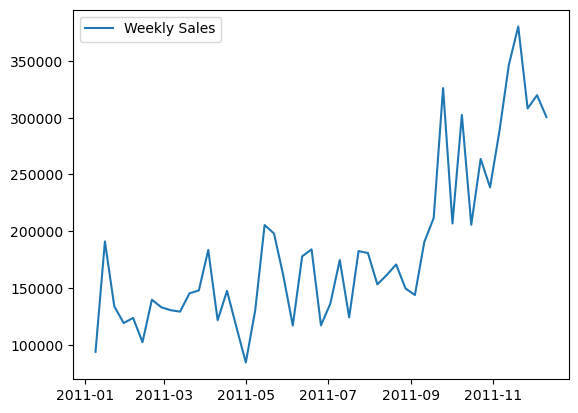

<Figure size 1000x1500 with 0 Axes>

In [12]:
plt.plot(weekly_sales , label = 'Weekly Sales')
plt.legend()
plt.figure(figsize=(10,15))
plt.show()

In [13]:
df = pd.DataFrame(weekly_sales)
df.head()

,Price
InvoiceDate,
2011-01-09,93720.93
2011-01-16,190994.96
2011-01-23,133782.91
2011-01-30,119136.81
2011-02-06,123642.18


In [14]:
df['log_Price'] = np.log(df['Price'])
df.head()

,Price,log_Price
InvoiceDate,,
2011-01-09,93720.93,11.448077
2011-01-16,190994.96,12.160002
2011-01-23,133782.91,11.803974
2011-01-30,119136.81,11.688028
2011-02-06,123642.18,11.725147


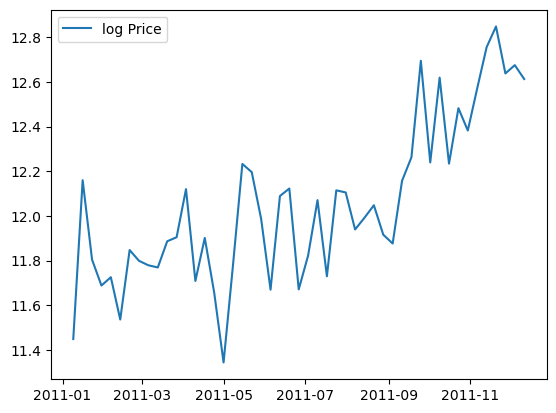

<Figure size 1000x1500 with 0 Axes>

In [15]:
plt.plot(df['log_Price'] , label = 'log Price')
plt.legend()
plt.figure(figsize=(10,15))
plt.show()

In [16]:
df['log_diff_price'] = df['log_Price'].diff(1)
df.dropna(inplace=True)

In [17]:
result = adfuller(df['log_diff_price'])
print(f'P_value : {result[1]}')
if result[1] > 0.05:
    print('تست نشان میده که داده های مانا نیستند')
else:
    print('داده ها مانا هستند')

P_value : 4.335022447391024e-07
داده ها مانا هستند


In [60]:
train_diff , test_diff = TimeSeriesSplit(n_splits=)

In [91]:
len(df['log_diff_price'])

48

# مدل آریما بدون در نظر گرفتن تغییرات فصلی

In [61]:
model_arima_diff = auto_arima(train_diff, seasonal=False)
print(model_arima_diff.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   36
Model:               SARIMAX(0, 0, 1)   Log Likelihood                   3.092
Date:                Wed, 29 Oct 2025   AIC                             -2.183
Time:                        23:26:32   BIC                              0.984
Sample:                    01-16-2011   HQIC                            -1.078
                         - 09-18-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8559      0.130     -6.595      0.000      -1.110      -0.602
sigma2         0.0475      0.012      4.113      0.000       0.025       0.070
Ljung-Box (L1) (Q):                   0.37   Jarque-

In [93]:
pred = model_arima_diff.predict()

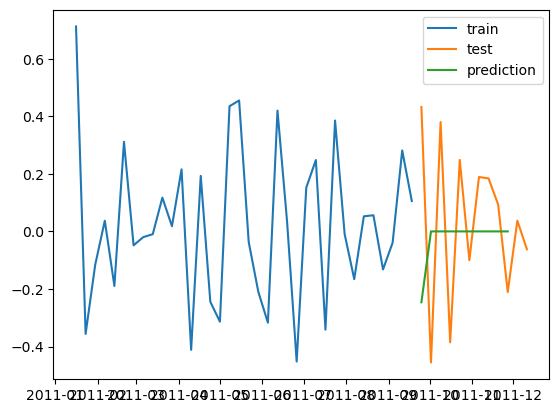

In [94]:
plt.plot(train_diff , label='train')
plt.plot(test_diff , label='test')
plt.plot(pred , label = 'prediction')
plt.legend()
plt.show()

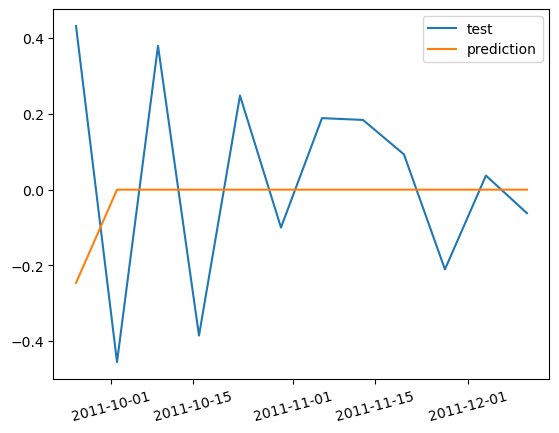

In [64]:
plt.plot(test_diff , label='test')
plt.plot(pred , label = 'prediction')
plt.xticks(rotation=15)
plt.legend()
plt.show()

In [65]:
print(f"MAE  : {mean_absolute_error(test_diff, pred):.2f}")
print(f"MSE  : {mean_squared_error(test_diff, pred):.2f}")
print(f"RMSE : {mean_squared_error(test_diff, pred):.2f}")
print(f"MAPE : {mean_absolute_percentage_error(test_diff, pred):.2f}%")

MAE  : 0.25
MSE  : 0.10
RMSE : 0.10
MAPE : 1.05%


# مدل آریما همراه با تغییرات فصلی

In [66]:
model_sarima_diff = auto_arima(train_diff, seasonal=True , d=1 )
print(model_sarima_diff.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   36
Model:               SARIMAX(5, 1, 1)   Log Likelihood                   0.690
Date:                Wed, 29 Oct 2025   AIC                             14.619
Time:                        23:26:32   BIC                             27.062
Sample:                    01-16-2011   HQIC                            18.915
                         - 09-18-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0003      0.006      0.050      0.960      -0.012       0.012
ar.L1         -0.5397      0.184     -2.941      0.003      -0.899      -0.180
ar.L2         -0.7476      0.271     -2.761      0.0

In [67]:
pred_s = model_sarima_diff.predict(period)

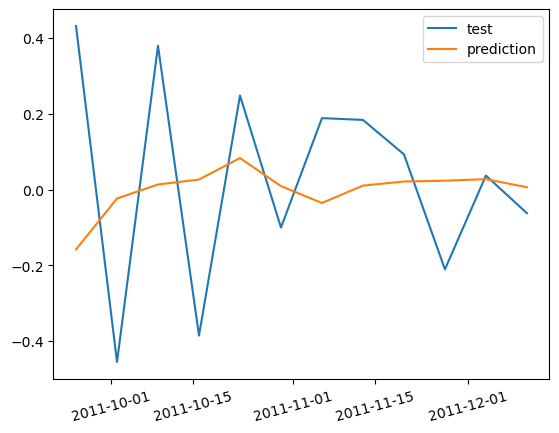

In [68]:
plt.plot(test_diff , label='test')
plt.plot(pred_s , label = 'prediction')
plt.xticks(rotation=15)
plt.legend()
plt.show()

In [69]:
print(f"MAE  : {mean_absolute_error(test_diff, pred_s):.2f}")
print(f"MSE  : {mean_squared_error(test_diff, pred_s):.2f}")
print(f"RMSE : {mean_squared_error(test_diff, pred_s):.2f}")
print(f"MAPE : {mean_absolute_percentage_error(test_diff, pred_s):.2f}%")

MAE  : 0.24
MSE  : 0.09
RMSE : 0.09
MAPE : 0.96%


# Parameter Tuning :
## انتخاب بهترین مدل

  

In [70]:
param_grid = {
    'p': [0, 1, 2],
    'd': [0, 1],
    'q': [0, 1, 2],
    'P': [0, 1],
    'D': [0],
    'Q': [0,1],
    'm': [7,12] 
}
grid = ParameterGrid(param_grid)


rmse_list = []

for i in grid:
    model_cv = ARIMA(order=(i['p'] , i['d'] , i['q']) , seasonal_order=(i['P'] , i['D'] , i['Q'] , i['m']))
    
    CV = model_selection.RollingForecastCV(h = 4 , step=1 , initial = int(0.4 * len(train_diff)))
    
    cv_score = model_selection.cross_val_score(model_cv , 
                                              y = train_diff  ,
                                              scoring='mean_squared_error'
                                              ,cv=CV , error_score=1000000)
    
    rmse = np.sqrt(np.average(cv_score))
    rmse_list.append(rmse)

In [71]:
min(rmse_list)

0.25914408254578014

In [72]:
best_params = grid[np.argmin(rmse_list)]
best_params

{'q': 1, 'p': 0, 'm': 7, 'd': 0, 'Q': 0, 'P': 0, 'D': 0}

In [73]:
train_diff

InvoiceDate
2011-01-16    0.711926
2011-01-23   -0.356029
2011-01-30   -0.115946
2011-02-06    0.037119
2011-02-13   -0.189512
2011-02-20    0.311364
2011-02-27   -0.048369
2011-03-06   -0.019995
2011-03-13   -0.009665
2011-03-20    0.117329
2011-03-27    0.018059
2011-04-03    0.215621
2011-04-10   -0.411502
2011-04-17    0.192833
2011-04-24   -0.244620
2011-05-01   -0.313573
2011-05-08    0.434894
2011-05-15    0.454923
2011-05-22   -0.036753
2011-05-29   -0.209697
2011-06-05   -0.317132
2011-06-12    0.419719
2011-06-19    0.033709
2011-06-26   -0.452111
2011-07-03    0.151851
2011-07-10    0.248070
2011-07-17   -0.341240
2011-07-24    0.385230
2011-07-31   -0.009353
2011-08-07   -0.165885
2011-08-14    0.052402
2011-08-21    0.056062
2011-08-28   -0.132065
2011-09-04   -0.039432
2011-09-11    0.281167
2011-09-18    0.105554
Freq: W-SUN, Name: log_diff_price, dtype: float64

In [83]:
model_tuned = ARIMA(order=(0,0,1) , seasonal_order=(0,0,0,12)).fit(train_diff)

In [84]:
pred_tuned = model_tuned.predict(period)

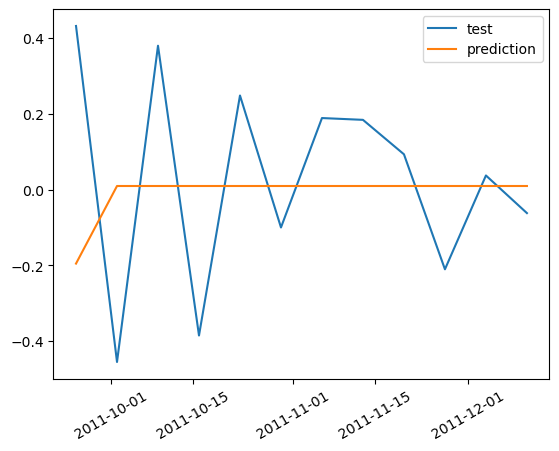

In [85]:
plt.plot(test_diff , label='test')
plt.plot(pred_tuned , label = 'prediction')
plt.xticks(rotation = 30)
plt.legend()

In [81]:
print(f"MAE  : {mean_absolute_error(test_diff, pred_tuned):.2f}")
print(f"MSE  : {mean_squared_error(test_diff, pred_tuned):.2f}")
print(f"RMSE : {mean_squared_error(test_diff, pred_tuned):.2f}")
print(f"MAPE : {mean_absolute_percentage_error(test_diff, pred_tuned):.2f}%")

MAE  : 0.25
MSE  : 0.09
RMSE : 0.09
MAPE : 1.02%
